In [165]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

In [166]:
class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, wet:bool, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

        self.wet = wet # Bool for wetness check
        if wet:
            self.BackColor = "#870101"
            self.BackNeckColor = "#ad4503"
            self.ChestColor = "#756a01"
            self.LeftAbColor = "#396102"
            self.RightAbColor = "#015c0b"
            self.LeftUpArmColor = "#01663f"
            self.RightUpArmColor = "#00a191"
            self.LeftLowArmColor = "#012173"
            self.RightLowArmColor = "#1e075e"
            
        else:
            self.BackColor = "#ff0d0d"
            self.BackNeckColor = "#ff7214"
            self.ChestColor = "#d1bc02"
            self.LeftAbColor = "#6bb803"
            self.RightAbColor = "#01bf16"
            self.LeftUpArmColor = "#03c278"
            self.RightUpArmColor = "#06b4cf"
            self.LeftLowArmColor = "#0443e0"
            self.RightLowArmColor = "#4c05e6"

In [167]:
# Harold, wet and dry
person2_wet = Person(True,  "Harold Wet", "#003952", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
person2_dry = Person(False, "Harold Dry", "#008dc9", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");

# Garrett
person1_wet = Person(True, "Garrett C.", "#0909eb", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");

In [168]:
################################
######## DAY 1 PLOTTING ########
################################

def MakeDataFromText_Day1(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds
                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                ### DAY 1, since it is gym test ###
                data.append(datetime.datetime(1970, 2, 1, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

b_gym1 = MakeDataFromText_Day1("MWTC/baseline_gym_1.txt")
b_gym2 = MakeDataFromText_Day1("MWTC/baseline_gym_2.txt")
b_gym3 = MakeDataFromText_Day1("MWTC/baseline_gym_3.txt")
b_gym4 = MakeDataFromText_Day1("MWTC/baseline_gym_4.txt")


# Average by the second
combined1 = dict()
for d in [b_gym1, b_gym2, b_gym3, b_gym4]:
    for k,v in d.items():
        if k in combined1: # if tag is already in dict 
            for i in range(len(v[0])):
                if v[0][i] in combined1[k]:
                    combined1[k][v[0][i]].append(v[1][i])
                else:
                    combined1[k][v[0][i]] = [v[1][i]]
        else: # if tag is not in dict
            combined1[k] = dict()
            for i in range(len(v[0])):
                combined1[k][v[0][i]] = [v[1][i]]
for k,v in combined1.items():
    for k2,v2 in v.items():
        combined1[k][k2] = sum(v2)/len(v2)


# Storing data for our two subjects of interest
p1 = person1_wet 
p2 = person2_wet

Back_BL_sum1 = []; Back_BL_time1 = []; Back_BL_sum2 = []; Back_BL_time2 = []
neck_BL_sum1 = []; neck_BL_time1 = []; neck_BL_sum2 = []; neck_BL_time2 = []
larm_BL_sum1 = []; larm_BL_time1 = []; larm_BL_sum2 = []; larm_BL_time2 = []
rarm_BL_sum1 = []; rarm_BL_time1 = []; rarm_BL_sum2 = []; rarm_BL_time2 = []
low_BL_sum1, low_BL_sum2, row_BL_sum1, row_BL_sum2 = [],[],[],[]
low_BL_time1 = []; low_BL_time2 = []; row_BL_time1 = []; row_BL_time2 = []
lab_BL_sum1 = []; lab_BL_time1 = []; lab_BL_sum2 = []; lab_BL_time2 = []
rab_BL_sum1 = []; rab_BL_time1 = []; rab_BL_sum2 = [];  rab_BL_time2 = [];
chst_BL_sum1 = []; chst_BL_time1 = []; chst_BL_sum2 = []; chst_BL_time2 = [];
b1_BL_sum1, b1_BL_sum2 = [],[]; b1_BL_time1, b1_BL_time2 = [],[];
b2_BL_sum1, b2_BL_sum2 = [],[]; b2_BL_time1, b2_BL_time2 = [],[];
b3_BL_sum1, b3_BL_sum2 = [],[]; b3_BL_time1, b3_BL_time2 = [],[];
bR_BL_sum1, bR_BL_sum2 = [],[]; bR_BL_time1, bR_BL_time2 = [],[];
bL_BL_sum1, bL_BL_sum2 = [],[]; bL_BL_time1, bL_BL_time2 = [],[];

times1 = [ datetime.datetime(1970, 2, 1, 14, 35, 0), datetime.datetime(1970, 2, 1, 14, 55, 0) ]
times2 = [ datetime.datetime(1970, 2, 1, 14, 20, 0), datetime.datetime(1970, 2, 1, 14, 35, 0) ]

for k,v in combined1.items():
        id = k[-4:]                            # four digit EPC slice

        if id in p1.TagList:
            s = sorted( v.items() )

            x,y = list(), list()
            for i in s:
                if i[0]>times1[0] and i[0]<times1[1]:
                    if i[1]<40.0:
                        x.append(i[0])
                        y.append(i[1])

            if id==p1.Back:
                Back_BL_time1 = x
                Back_BL_sum1 = y
            elif id==p1.Backneck:
                neck_BL_time1 = x
                neck_BL_sum1 = y
            elif id==p1.Leftuparm:
                larm_BL_sum1 = y
                larm_BL_time1 = x
            elif id==p1.Rightuparm:
                rarm_BL_sum1 = y
                rarm_BL_time1 = x
            elif id==p1.Leftlowarm:
                low_BL_sum1 = y
                low_BL_time1 = x
            elif id==p1.Rightlowarm:
                row_BL_sum1 = y
                row_BL_time1 = x
            elif id==p1.Leftab:
                lab_BL_sum1 = y
                lab_BL_time1 = x
            elif id==p1.Rightab:
                rab_BL_sum1 = y
                rab_BL_time1 = x
            elif id==p1.Chest:
                chst_BL_sum1 = y
                chst_BL_time1 = x
            elif id==p1.Beanie1:
                b1_BL_sum1 = y
                b1_BL_time1 = x
            elif id==p1.Beanie2:
                b2_BL_sum1 = y
                b2_BL_time1 = x
            elif id==p1.Beanie3:
                b3_BL_sum1 = y
                b3_BL_time1 = x
            elif id==p1.BeanieR:
                bR_BL_sum1 = y
                bR_BL_time1 = x
            elif id==p1.BeanieL:
                bL_BL_sum1 = y
                bL_BL_time1 = x
        
        elif id in p2.TagList:
            s = sorted( v.items() )
            
            x,y = list(), list()
            for i in range(len(s)):
                if s[i][0]>times2[0] and s[i][0]<times2[1]:
                    if s[i][1]<40.0:

                        try: 
                            if abs(s[i][1]-s[i-1][1]) < 1.0:
                                x.append(s[i][0])
                                y.append(s[i][1])
                            continue
                        except:
                            x.append(s[i][0])
                            y.append(s[i][1])
            
            if id==p2.Back:
                Back_BL_time2 = x
                Back_BL_sum2 = y
            elif id==p2.Backneck:
                neck_BL_time2 = x
                neck_BL_sum2 = y
            elif id==p2.Leftuparm:
                larm_BL_sum2 = y
                larm_BL_time2 = x
            elif id==p2.Rightuparm:
                rarm_BL_sum2 = y
                rarm_BL_time2 = x
            elif id==p2.Leftlowarm:
                low_BL_sum2 = y
                low_BL_time2 = x
            elif id==p2.Rightlowarm:
                row_BL_sum2 = y
                row_BL_time2 = x
            elif id==p2.Leftab:
                lab_BL_sum2 = y
                lab_BL_time2 = x
            elif id==p2.Rightab:
                rab_BL_sum2 = y
                rab_BL_time2 = x
            elif id==p2.Chest:
                chst_BL_sum2 = y
                chst_BL_time2 = x
            elif id==p2.Beanie1:
                b1_BL_sum2 = y
                b1_BL_time2 = x
            elif id==p2.Beanie2:
                b2_BL_sum2 = y
                b2_BL_time2 = x
            elif id==p2.Beanie3:
                b3_BL_sum2 = y
                b3_BL_time2 = x
            elif id==p2.BeanieR:
                bR_BL_sum2 = y
                bR_BL_time2 = x
            elif id==p2.BeanieL:
                bL_BL_sum2 = y
                bL_BL_time2 = x

In [169]:
################################
######## DAY 2 PLOTTING ########
################################

def MakeDataFromText_Day2(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds
                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2
                
                ### DAY 2, since it is immersion test ###
                data.append(datetime.datetime(1970, 2, 2, int(h) - 3, int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

t1 = MakeDataFromText_Day2("MWTC/trevor_test_1.txt")
t2 = MakeDataFromText_Day2("MWTC/trevor_test_2.txt")
t3 = MakeDataFromText_Day2("MWTC/trevor_test_3.txt")
t4 = MakeDataFromText_Day2("MWTC/trevor_test_4.txt")
t5 = MakeDataFromText_Day2("MWTC/trevor_test_5.txt")
t6 = MakeDataFromText_Day2("MWTC/trevor_test_6.txt")
t7 = MakeDataFromText_Day2("MWTC/trevor_test_7.txt")
t8 = MakeDataFromText_Day2("MWTC/trevor_test_8.txt")
y1 = MakeDataFromText_Day2("MWTC/yoel_test_1.txt")
y2 = MakeDataFromText_Day2("MWTC/yoel_test_2.txt")
y3 = MakeDataFromText_Day2("MWTC/yoel_test_3.txt")
y4 = MakeDataFromText_Day2("MWTC/yoel_test_4.txt")

combined2 = dict()
for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:

    for k,v in d.items():
        if k in combined2: # if tag is already in dict
            
            for i in range(len(v[0])):
                if v[0][i] in combined2[k]:
                    combined2[k][v[0][i]].append(v[1][i])
                else:
                    combined2[k][v[0][i]] = [v[1][i]]
        
        else: # if tag is not in dict
            combined2[k] = dict()
            for i in range(len(v[0])):
                combined2[k][v[0][i]] = [v[1][i]]
for k,v in combined2.items():
    for k2,v2 in v.items():
        combined2[k][k2] = sum(v2)/len(v2)

p1 = person1_wet 
p2 = person2_wet
pd = person2_dry

Back_im_sum1 = []; Back_im_time1 = []; Back_im_sum2 = []; Back_im_time2 = []; Back_im_sum3 = []; Back_im_time3 = []
Neck_im_sum1 = []; Neck_im_time1 = []; Neck_im_sum2 = []; Neck_im_time2 = []; Neck_im_sum3 = []; Neck_im_time3 = []
chst_im_sum1 = []; chst_im_time1 = []; chst_im_sum2 = []; chst_im_time2 = []; chst_im_sum3 = []; chst_im_time3 = []
b1_im_sum1 = []; b1_im_time1 = []; b1_im_sum2 = []; b1_im_time2 = []; b1_im_sum3 = []; b1_im_time3 = []
b2_im_sum1 = []; b2_im_time1 = []; b2_im_sum2 = []; b2_im_time2 = []; b2_im_sum3 = []; b2_im_time3 = []
b3_im_sum1 = []; b3_im_time1 = []; b3_im_sum2 = []; b3_im_time2 = []; b3_im_sum3 = []; b3_im_time3 = []
bL_im_sum1 = []; bL_im_time1 = []; bL_im_sum2 = []; bL_im_time2 = []; bL_im_sum3 = []; bL_im_time3 = []
bR_im_sum1 = []; bR_im_time1 = []; bR_im_sum2 = []; bR_im_time2 = []; bR_im_sum3 = []; bR_im_time3 = []
lab_im_sum1 = []; lab_im_time1 = []; lab_im_sum2 = []; lab_im_time2 = []; lab_im_sum3 = []; lab_im_time3 = []
rab_im_sum1 = []; rab_im_time1 = []; rab_im_sum2 = []; rab_im_time2 = []; rab_im_sum3 = []; rab_im_time3 = []
larm_im_sum1 = []; larm_im_time1 = []; larm_im_sum2 = []; larm_im_time2 = []; larm_im_sum3 = []; larm_im_time3 = []
rarm_im_sum1 = []; rarm_im_time1 = []; rarm_im_sum2 = []; rarm_im_time2 = []; rarm_im_sum3 = []; rarm_im_time3 = []
low_im_sum1 = []; low_im_time1 = []; low_im_sum2 = []; low_im_time2 = []; low_im_sum3 = []; low_im_time3 = []
row_im_sum1 = []; row_im_time1 = []; row_im_sum2 = []; row_im_time2 = []; row_im_sum3 = []; row_im_time3 = []

# Wet Shirt Times
times1 = [ datetime.datetime(1970, 2, 2, 7, 59, 0), datetime.datetime(1970, 2, 2, 8, 35, 0) ]
times2 = [ datetime.datetime(1970, 2, 2, 8, 1, 0), datetime.datetime(1970, 2, 2, 8, 36, 0) ]
times2_dry = [ datetime.datetime(1970, 2, 2, 8, 35, 0), datetime.datetime(1970, 2, 2, 8, 55, 0) ]

##############################
### GETTING WET SHIRT DATA ###
##############################
for k,v in combined2.items():
        id = k[-4:]

        if id in p1.TagList:
            s = sorted( v.items() )

            x,y = list(), list()
            for i in s:
                if i[0]>times1[0] and i[0]<times1[1]:
                    if i[1]<40.0:
                        x.append(i[0])
                        y.append(i[1])

            if id == p1.Back:
                Back_im_time1 = x
                Back_im_sum1 = y
            elif id == p1.Backneck:
                Neck_im_time1 = x
                Neck_im_sum1 = y
            elif id == p1.Chest:
                chst_im_time1 = x
                chst_im_sum1 = y
            elif id==p1.Leftuparm:
                larm_im_time1 = x
                larm_im_sum1 = y
            elif id==p1.Rightuparm:
                rarm_im_time1 = x
                rarm_im_sum1 = y
            elif id==p1.Leftlowarm:
                low_im_time1 = x
                low_im_sum1 = y
            elif id==p1.Rightlowarm:
                row_im_time1 = x
                row_im_sum1 = y
            elif id==p1.Leftab:
                lab_im_time1 = x
                lab_im_sum1 = y
            elif id==p1.Rightab:
                rab_im_time1 = x
                rab_im_sum1 = y
            elif id==p1.Beanie1:
                b1_im_time1 = x
                b1_im_sum1 = y
            elif id==p1.Beanie2:
                b2_im_time1 = x
                b2_im_sum1 = y
            elif id==p1.Beanie3:
                b3_im_time1 = x
                b3_im_sum1 = y
            elif id==p1.BeanieL:
                bL_im_time1 = x
                bL_im_sum1 = y
            elif id==p1.BeanieR:
                bR_im_time1 = x
                bR_im_sum1 = y

        elif id in p2.TagList:
            s = sorted( v.items() )

            x,y = list(), list()
            for i in s:
                if i[0]>times2[0] and i[0]<times2[1]:
                    if i[1]<40.0:
                        x.append(i[0])
                        y.append(i[1])
            
            if id == p2.Back:
                Back_im_time2 = x
                Back_im_sum2 = y
            elif id == p2.Backneck:
                Neck_im_time2 = x
                Neck_im_sum2 = y
            elif id == p2.Chest:
                chst_im_time2 = x
                chst_im_sum2 = y
            elif id==p2.Leftuparm:
                larm_im_time2 = x
                larm_im_sum2 = y
            elif id==p2.Rightuparm:
                rarm_im_time2 = x
                rarm_im_sum2 = y
            elif id==p2.Leftlowarm:
                low_im_time2 = x
                low_im_sum2 = y
            elif id==p2.Rightlowarm:
                row_im_time2 = x
                row_im_sum2 = y
            elif id==p2.Leftab:
                lab_im_time2 = x
                lab_im_sum2 = y
            elif id==p2.Rightab:
                rab_im_time2 = x
                rab_im_sum2 = y
            elif id==p2.Beanie1:
                b1_im_time2 = x
                b1_im_sum2 = y
            elif id==p2.Beanie2:
                b2_im_time2 = x
                b2_im_sum2 = y
            elif id==p2.Beanie3:
                b3_im_time2 = x
                b3_im_sum2 = y
            elif id==p2.BeanieL:
                bL_im_time2 = x
                bL_im_sum2 = y
            elif id==p2.BeanieR:
                bR_im_time2 = x
                bR_im_sum2 = y

        elif id in pd.TagList:
            s = sorted( v.items() )

            x,y = list(), list()
            for i in s:
                if i[0]>times2_dry[0] and i[0]<times2_dry[1]:
                    x.append(i[0])
                    y.append(i[1])
            
            if id == pd.Back:
                Back_im_time3 = x
                Back_im_sum3 = y
            elif id == pd.Backneck:
                Neck_im_time3 = x
                Neck_im_sum3 = y
            elif id == pd.Chest:
                chst_im_time3 = x
                chst_im_sum3 = y
            elif id==pd.Leftuparm:
                larm_im_time3 = x
                larm_im_sum3 = y
            elif id==pd.Rightuparm:
                rarm_im_time3 = x
                rarm_im_sum3 = y
            elif id==pd.Leftlowarm:
                low_im_time3 = x
                low_im_sum3 = y
            elif id==pd.Rightlowarm:
                row_im_time3 = x
                row_im_sum3 = y
            elif id==pd.Leftab:
                lab_im_time3 = x
                lab_im_sum3 = y
            elif id==pd.Rightab:
                rab_im_time3 = x
                rab_im_sum3 = y
            elif id==pd.Beanie1:
                b1_im_time3 = x
                b1_im_sum3 = y
            elif id==pd.Beanie2:
                b2_im_time3 = x
                b2_im_sum3 = y
            elif id==pd.Beanie3:
                b3_im_time3 = x
                b3_im_sum3 = y
            elif id==pd.BeanieL:
                bL_im_time3 = x
                bL_im_sum3 = y
            elif id==pd.BeanieR:
                bR_im_time3 = x
                bR_im_sum3 = y

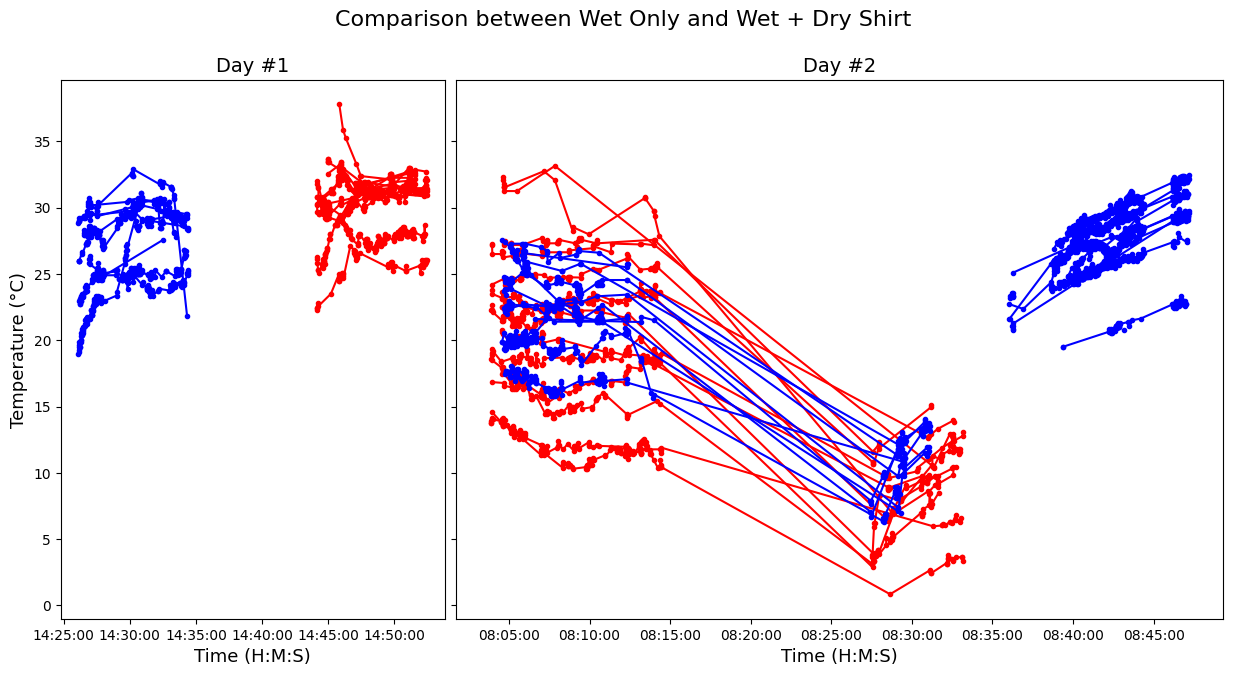

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True, gridspec_kw={'width_ratios': [1, 2]})
fig.subplots_adjust(wspace=0.02)
fig.suptitle("Comparison between Wet Only and Wet + Dry Shirt", fontsize=16)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # correct Hours Minutes Seconds display
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.set_ylabel("Temperature (°C)", fontsize=13)
ax1.set_xlabel("Time (H:M:S)", fontsize=13)
ax2.set_xlabel("Time (H:M:S)", fontsize=13)
ax1.set_title("Day #1", fontsize=14)
ax2.set_title("Day #2", fontsize=14)

color1, color2 = 'red', 'blue'

ax1.plot(Back_BL_time1, Back_BL_sum1, color=color1, label='Back',  marker=".")
ax1.plot(neck_BL_time1, neck_BL_sum1, color=color1, label='Neck',  marker=".")
ax1.plot(chst_BL_time1, chst_BL_sum1, color=color1, label='Chest', marker=".")
ax1.plot(larm_BL_time1, larm_BL_sum1, color=color1, label='Left Arm',  marker=".")
ax1.plot(rarm_BL_time1, rarm_BL_sum1, color=color1, label='Right Arm', marker=".")
ax1.plot(low_BL_time1,  low_BL_sum1,  color=color1, label='Left Low Arm',  marker=".")
ax1.plot(row_BL_time1,  row_BL_sum1,  color=color1, label='Right Low Arm', marker=".")
ax1.plot(lab_BL_time1,  lab_BL_sum1,  color=color1, label='Left Ab',  marker=".")
ax1.plot(rab_BL_time1,  rab_BL_sum1,  color=color1, label='Right Ab', marker=".")
ax1.plot(b1_BL_time1,   b1_BL_sum1,   color=color1, label='Beanie 1', marker=".")
ax1.plot(b2_BL_time1,   b2_BL_sum1,   color=color1, label='Beanie 2', marker=".")
ax1.plot(b3_BL_time1,   b3_BL_sum1,   color=color1, label='Beanie 3', marker=".")
ax1.plot(bL_BL_time1,   bL_BL_sum1,   color=color1, label='Beanie L', marker=".")
ax1.plot(bR_BL_time1,   bR_BL_sum1,   color=color1, label='Beanie R', marker=".")

ax1.plot(Back_BL_time2, Back_BL_sum2, color=color2, label='Back', marker=".")
ax1.plot(neck_BL_time2, neck_BL_sum2, color=color2, label='Neck', marker=".")
ax1.plot(chst_BL_time2, chst_BL_sum2, color=color2, label='Chest', marker=".")
ax1.plot(larm_BL_time2, larm_BL_sum2, color=color2, label='Left Arm', marker=".")
ax1.plot(rarm_BL_time2, rarm_BL_sum2, color=color2, label='Right Arm', marker=".")
ax1.plot(low_BL_time2, low_BL_sum2, color=color2, label='Left Low Arm', marker=".")
ax1.plot(row_BL_time2, row_BL_sum2, color=color2, label='Right Low Arm', marker=".")
ax1.plot(lab_BL_time2, lab_BL_sum2, color=color2, label='Left Ab', marker=".")
ax1.plot(rab_BL_time2, rab_BL_sum2, color=color2, label='Right Ab', marker=".")
ax1.plot(b1_BL_time2, b1_BL_sum2, color=color2, label='Beanie 1', marker=".")
ax1.plot(b2_BL_time2, b2_BL_sum2, color=color2, label='Beanie 2', marker=".")
ax1.plot(b3_BL_time2, b3_BL_sum2, color=color2, label='Beanie 3', marker=".")
ax1.plot(bL_BL_time2, bL_BL_sum2, color=color2, label='Beanie L', marker=".")
ax1.plot(bR_BL_time2, bR_BL_sum2, color=color2, label='Beanie R', marker=".")

ax2.plot(Back_im_time1, Back_im_sum1, color=color1, label='Back', marker=".")
ax2.plot(Neck_im_time1, Neck_im_sum1, color=color1, label='Neck', marker=".")
ax2.plot(chst_im_time1, chst_im_sum1, color=color1, label='Chest', marker=".")
ax2.plot(larm_im_time1, larm_im_sum1, color=color1, label='Left Arm', marker=".")
ax2.plot(rarm_im_time1, rarm_im_sum1, color=color1, label='Right Arm', marker=".")
ax2.plot(low_im_time1, low_im_sum1, color=color1, label='Left Low Arm', marker=".")
ax2.plot(row_im_time1, row_im_sum1, color=color1, label='Right Low Arm', marker=".")
ax2.plot(lab_im_time1, lab_im_sum1, color=color1, label='Left Ab', marker=".")
ax2.plot(rab_im_time1, rab_im_sum1, color=color1, label='Right Ab', marker=".")
ax2.plot(b1_im_time1, b1_im_sum1, color=color1, label='Beanie 1', marker=".")
ax2.plot(b2_im_time1, b2_im_sum1, color=color1, label='Beanie 2', marker=".")
ax2.plot(b3_im_time1, b3_im_sum1, color=color1, label='Beanie 3', marker=".")
ax2.plot(bL_im_time1, bL_im_sum1, color=color1, label='Beanie L', marker=".")
ax2.plot(bR_im_time1, bR_im_sum1, color=color1, label='Beanie R', marker=".")

ax2.plot(Back_im_time2, Back_im_sum2, color=color2, label='Back', marker=".")
ax2.plot(Neck_im_time2, Neck_im_sum2, color=color2, label='Neck', marker=".")
ax2.plot(chst_im_time2, chst_im_sum2, color=color2, label='Chest', marker=".")
ax2.plot(larm_im_time2, larm_im_sum2, color=color2, label='Left Arm', marker=".")
ax2.plot(rarm_im_time2, rarm_im_sum2, color=color2, label='Right Arm', marker=".")
ax2.plot(low_im_time2, low_im_sum2, color=color2, label='Left Low Arm', marker=".")
ax2.plot(row_im_time2, row_im_sum2, color=color2, label='Right Low Arm', marker=".")
ax2.plot(lab_im_time2, lab_im_sum2, color=color2, label='Left Ab', marker=".")
ax2.plot(rab_im_time2, rab_im_sum2, color=color2, label='Right Ab', marker=".")
ax2.plot(b1_im_time2, b1_im_sum2, color=color2, label='Beanie 1', marker=".")
ax2.plot(b2_im_time2, b2_im_sum2, color=color2, label='Beanie 2', marker=".")
ax2.plot(b3_im_time2, b3_im_sum2, color=color2, label='Beanie 3', marker=".")
ax2.plot(bL_im_time2, bL_im_sum2, color=color2, label='Beanie L', marker=".")
ax2.plot(bR_im_time2, bR_im_sum2, color=color2, label='Beanie R', marker=".")

ax2.plot(Back_im_time3, Back_im_sum3, color=color2, label='Back', marker=".")
ax2.plot(Neck_im_time3, Neck_im_sum3, color=color2, label='Neck', marker=".")
ax2.plot(chst_im_time3, chst_im_sum3, color=color2, label='Chest', marker=".")
ax2.plot(larm_im_time3, larm_im_sum3, color=color2, label='Left Arm', marker=".")
ax2.plot(rarm_im_time3, rarm_im_sum3, color=color2, label='Right Arm', marker=".")
ax2.plot(low_im_time3, low_im_sum3, color=color2, label='Left Low Arm', marker=".")
ax2.plot(row_im_time3, row_im_sum3, color=color2, label='Right Low Arm', marker=".")
ax2.plot(lab_im_time3, lab_im_sum3, color=color2, label='Left Ab', marker=".")
ax2.plot(rab_im_time3, rab_im_sum3, color=color2, label='Right Ab', marker=".")
ax2.plot(b1_im_time3, b1_im_sum3, color=color2, label='Beanie 1', marker=".")
ax2.plot(b2_im_time3, b2_im_sum3, color=color2, label='Beanie 2', marker=".")
ax2.plot(b3_im_time3, b3_im_sum3, color=color2, label='Beanie 3', marker=".")
ax2.plot(bL_im_time3, bL_im_sum3, color=color2, label='Beanie L', marker=".")
ax2.plot(bR_im_time3, bR_im_sum3, color=color2, label='Beanie R', marker=".")